## **데이터 소개**

**온라인 교육에서 사용하는 'advertising.csv'를 구할 수 없어 구글링을 통해 얻은 데이터에서 'Age' 변수를 임의로 84개의 missing value를 생성하여 학습하였다.**


**<변수정보>**  
Daily Time Spent on Site = '사이트이용시간'  
Age = '나이'  
Area Income = '지역의 대한 수입'  
Daily Internet Usage = '인터넷사용시간'  
Ad Topic Line = '광고에 대한 설명'  
City = '도시'  
Male = '성별'  
Country = '나라'  
Timestamp = '시간'  
**Clicked on Ad** = '광고이용여부' (target)

## Logistic Regression
<p align="center">  
    <img src="https://user-images.githubusercontent.com/50131912/116975144-20619680-acfa-11eb-8c08-db9bb3fa7d5f.JPG"/>  
</p>
- 그림과 같이 나이와 암 발생 여부(1:발병, 0:정상) 데이터가 주어졌을때 발생 여부의 값 두개를 바꿔도 큰 상관이 없고, 아무 의미가 없을 때 로지스틱 회귀모델 사용  

<p align="center">  
    <img src="https://user-images.githubusercontent.com/50131912/116975776-1b511700-acfb-11eb-842d-bb9fc0d54338.JPG"/>  
</p>
- 실제 사회현상에서는 특정 변수에 대한 확률값이 선형이 아닌 S-커브 형태를 따르는 경우가 많음. 이 함수를 로지스틱 함수 또는 시그모이드 함수로 불림  
    


<p align="center">  
    <img src="https://user-images.githubusercontent.com/50131912/116975589-da590280-acfa-11eb-9e8c-e5595acd6876.JPG" width="300"/>  
</p>
- 임의의 사건 A가 발생하지 않을 확률 대비 일어날 확률의 비율을 뜻하는 개념  
- 만약 P(A)가 1에 가까울수록 승산을 치솟을 것으로 위 그림과 같음


<p align="center">  
    <img src="https://user-images.githubusercontent.com/50131912/116975608-e218a700-acfa-11eb-9768-4428aa2ab2d3.JPG" width="350"/> 
</p> 
- 1번 : 회귀식에서 우변은 그대로 두고 좌변만 종속변수 범주 1이 될 확률로 바꿈  
- 2번 : 좌변의 범위는 0~1 사이이지만 음의 무한대에서 양의 무한대 범위를 가지기 때문에 식이 성립하지 않는 경우가 존재할 수 있기 때문에 승산(Odds)로 변경  
- 이번엔 양변의 범위가 서로 맞지 않음.(좌변은 0에서 무한대, 우변은 음의 무한대에서 양의 무한대 범위를 가짐)  
- 좌변에 로그를 취하면? 로그 승산의 범위 또한 우변처럼 음의 무한대에서 양의 무한대로되면서 양쪽 범위가 일치하게 되면 아래와 같은 그림으로 바뀜  

<p align="center">  
    <img src="https://user-images.githubusercontent.com/50131912/116975635-e93fb500-acfa-11eb-993f-e35f276d23ff.JPG" width="200"/>   
</p>

**뉴럴넷과의 관계**  
<p align="center">  
    <img src="https://user-images.githubusercontent.com/50131912/116975563-d0cf9a80-acfa-11eb-9dcb-72491d314f80.JPG" width="350"/>  
</p>
    - feed-forward neural network의 Fully connected Layer의 하나의 셀에 활성함수로 시그모이드를 쓰면 이항 로지스틱 회귀와 같음

*자료참고*  
https://ratsgo.github.io/machine%20learning/2017/04/02/logistic/


## 모듈, 데이터 로딩 및 데이터 확인

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
path_dir = os.getcwd()
data = pd.read_csv(path_dir+'/data/E-commerce/advertising.csv')
data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35.0,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 0:53,0
1,80.23,31.0,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 1:39,0
2,69.47,26.0,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35,0
3,74.15,29.0,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 2:31,0
4,68.37,35.0,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 3:36,0


`data.info()`명령어를 통해 변수별 타입과 결측치를 확인할 수 있음  
`data.describe()` 명령어를 통해 데이터의 분포 정보를 간략하게 알 수 있음  

>**Area Income** 변수의 경우 min값과 25% 값의 차이가 크기 때문에 왼쪽으로 꼬리가 긴 형태의 분포를 갖고,  
>**Male** 변수의 경우 0과 1만 가지는데 mean값이 0.48이므로 성별 비율은 절반이며,  
>**Clicked on Ad** 변수의 경우도 클릭 여부가 절반씩 된다는 간략한 정보를 얻을 수 있음.

In [3]:
print(data.info())

display(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       916 non-null    float64
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(4), int64(2), object(4)
memory usage: 78.2+ KB
None


,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,916.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.073144,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.815913,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


<AxesSubplot:xlabel='Area Income', ylabel='Density'>

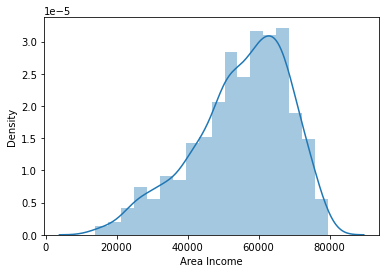

In [4]:
sns.distplot(data['Area Income'])

<AxesSubplot:xlabel='Age', ylabel='Density'>

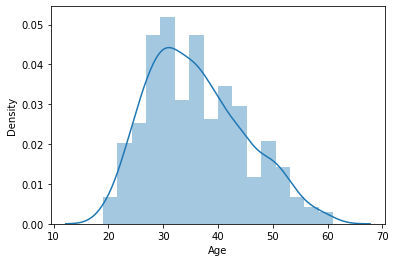

In [5]:
sns.distplot(data['Age'])

**텍스트 변수 확인**  
'Country' : 237개의 국가  
'City' : 969개의 도시  
'Ad Topic Line' : 1000개의 주제  
→ 향후 텍스트분석 등으로 사용 가능하나 현재 모델에서는 고유값이 다양한 변수를 제외하고 분석 

In [6]:
print("'Country' unique count : ",data['Country'].nunique())
print("'City' unique count : ",data['City'].nunique())
print("'Ad Topic Line' unique count : ",data['Ad Topic Line'].nunique())

'Country' unique count :  237
'City' unique count :  969
'Ad Topic Line' unique count :  1000


**결측 확인**  
`data.isna()` : 전체 데이터에 대해서 불리안값으로 출력  
`data.isna().sum()` : 변수별 결측치 개수의 합 출력  
`data.isna().sum()/len(data)`: 변수별 결측치 % 비율 출력

In [7]:
print(data.isna())
print(data.isna().sum())
print(data.isna().sum()/len(data))

     Daily Time Spent on Site    Age  Area Income  Daily Internet Usage  \
0                       False  False        False                 False   
1                       False  False        False                 False   
2                       False  False        False                 False   
3                       False  False        False                 False   
4                       False  False        False                 False   
..                        ...    ...          ...                   ...   
995                     False  False        False                 False   
996                     False  False        False                 False   
997                     False   True        False                 False   
998                     False  False        False                 False   
999                     False  False        False                 False   

     Ad Topic Line   City   Male  Country  Timestamp  Clicked on Ad  
0            False  False  Fa

**결측처리**  
`data.dropna()` :  결측이 포함된 데이터(행) 전체 삭제(1000→916)  
`data.dropna(inplace=True)` : data가 삭제된 후 업데이트되어 저장됨  
`data.drop(['Age'], axis=1)` : Age 변수 삭제  
→ 결측이 포함된 행 자체를 삭제할 경우 데이터가 존재하는 다른 변수들의 정보를 잃게 되고, 변수를 삭제할 경우 중요한 정보 손실이 될 수 있음.  
→ 해당 변수가 전체의 70~80% 결측을 갖는 경우에는 삭제해주는게 좋음  
→ 결측이 의미있는 경우일 경우는 해당 변수를 텍스트로 가져감으로써 nan 자체를 카테고리화 하는 방법이 있음★

In [8]:
display(data.dropna())
display(data.drop(['Age'], axis=1))

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35.0,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 0:53,0
1,80.23,31.0,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 1:39,0
2,69.47,26.0,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35,0
3,74.15,29.0,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 2:31,0
4,68.37,35.0,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 3:36,0
...,...,...,...,...,...,...,...,...,...,...
994,43.70,51.0,63126.96,173.01,Front-line bifurcated ability,Nicholasland,0,Mayotte,2016-04-04 3:57,1
995,72.97,19.0,71384.57,208.58,Fundamental modular algorithm,Duffystad,1,Lebanon,2016-02-11 21:49,1
996,51.30,26.0,67782.17,134.42,Grass-roots cohesive monitoring,New Darlene,1,Bosnia and Herzegovina,2016-04-22 2:07,1
998,55.55,34.0,41920.79,187.95,Proactive bandwidth-monitored policy,West Steven,0,Guatemala,2016-03-24 2:35,0


,Daily Time Spent on Site,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 0:53,0
1,80.23,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 1:39,0
2,69.47,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35,0
3,74.15,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 2:31,0
4,68.37,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 3:36,0
...,...,...,...,...,...,...,...,...,...
995,72.97,71384.57,208.58,Fundamental modular algorithm,Duffystad,1,Lebanon,2016-02-11 21:49,1
996,51.30,67782.17,134.42,Grass-roots cohesive monitoring,New Darlene,1,Bosnia and Herzegovina,2016-04-22 2:07,1
997,51.63,42415.72,120.37,Expanded intangible solution,South Jessica,1,Mongolia,2016-02-01 17:24,1
998,55.55,41920.79,187.95,Proactive bandwidth-monitored policy,West Steven,0,Guatemala,2016-03-24 2:35,0


**결측대체**  
`fillna()` : 결측 채우는 명령어

**결측대체 방법**  
1. 특정숫자  
2. 평균 혹은 중앙값  
3. MICE, KNN 등

In [9]:
print("'Age' Mean value : ",data['Age'].mean())
print("'Age' Median value : ",data['Age'].median()) # 이상치가 존재할 때 mean의 경우 영향을 받을 수 있음

data.fillna(round(data['Age'].mean()), inplace=True)

# 결측 대체 확인
data.isna().sum()

'Age' Mean value :  36.0731441048035
'Age' Median value :  35.0


Daily Time Spent on Site    0
Age                         0
Area Income                 0
Daily Internet Usage        0
Ad Topic Line               0
City                        0
Male                        0
Country                     0
Timestamp                   0
Clicked on Ad               0
dtype: int64

## Train, Test set 나누기

In [10]:
from sklearn.model_selection import train_test_split

X = data.drop(['Clicked on Ad', 'Ad Topic Line', 'City', 'Country', 'Timestamp'], axis=1)
y = data['Clicked on Ad']

X_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

## Logistic Regression 모델 생성 및 평가
  
1) `import statsmodels.formula.api as sm` : summary 기능 제공하지만, 기본적으로 y절편에 해당하는 bias 부분을 포함하지 않는다. 사용하려면 별도의 function을 써야함  
2) `from sklearn.linear_model import LogisticRegression` : summary 기능을 제공하지 않으나 bias 부분을 포함함

In [11]:
from sklearn.linear_model import LogisticRegression

# 모델 생성
model = LogisticRegression()
model.fit(X_train, y_train)

print("X varible coeficient : ",model.coef_) # 독립변수 순서대로 출력

# 모델 예측
pred = model.predict(x_test) 

# 모델 평가
from sklearn.metrics import accuracy_score, confusion_matrix

print("Model accuracy : ",accuracy_score(y_test, pred))
print(confusion_matrix(y_test, pred))

X varible coeficient :  [[-6.09268339e-02  1.84411464e-01  1.31385214e-05 -2.05520370e-02
   2.88796960e-03]]
Model accuracy :  0.79
[[124  21]
 [ 42 113]]
